# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Decision Tree (CART-Classification and Regression Trees)</b></p>

**Tree-Based Models and Their Features**

Tree-based models include algorithms such as decision trees, random forests, and gradient boosting machines. These models have several advantages due to their nonparametric and flexible nature.

### **1. Nonparametric Structure**
- **Explanation**: Nonparametric models do not assume a predefined distribution of the data and do not set a fixed model structure. This allows the model to learn complex patterns specific to the data.
- **Impact**: Tree-based models adapt to the complexity and features of the dataset, making them particularly advantageous for nonlinear relationships.

### **2. Compatibility with Numerical and Categorical Data**
- **Explanation**: Tree-based models can naturally handle both numerical and categorical data.
- **Impact**: The model can directly use numerical and categorical data (such as "yes/no", "present/absent"), simplifying the data preprocessing process.

### **3. Insensitivity to Multicollinearity**
- **Explanation**: Tree-based models are resistant to multicollinearity (high correlation between features).
- **Impact**: Highly correlated features do not significantly affect the model’s performance, reducing the need for feature selection and engineering.

### **4. No Need for Scaling**
- **Explanation**: Tree-based models do not require feature scaling.
- **Impact**: Data can be used directly without the need for scaling, simplifying the preprocessing steps.

### **5. Use of Pipeline**
- **Explanation**: While tree-based models are unaffected by issues like scaling or multicollinearity, pipelines can still be used for data preprocessing and model parameter optimization.
- **Impact**: A pipeline structure integrates data preprocessing and modeling steps, making the code more organized and manageable.

### **Conclusion**
The flexibility and robustness of tree-based models make them useful in various datasets and problems. However, they can be prone to overfitting, and hyperparameter tuning may be crucial for optimal performance.

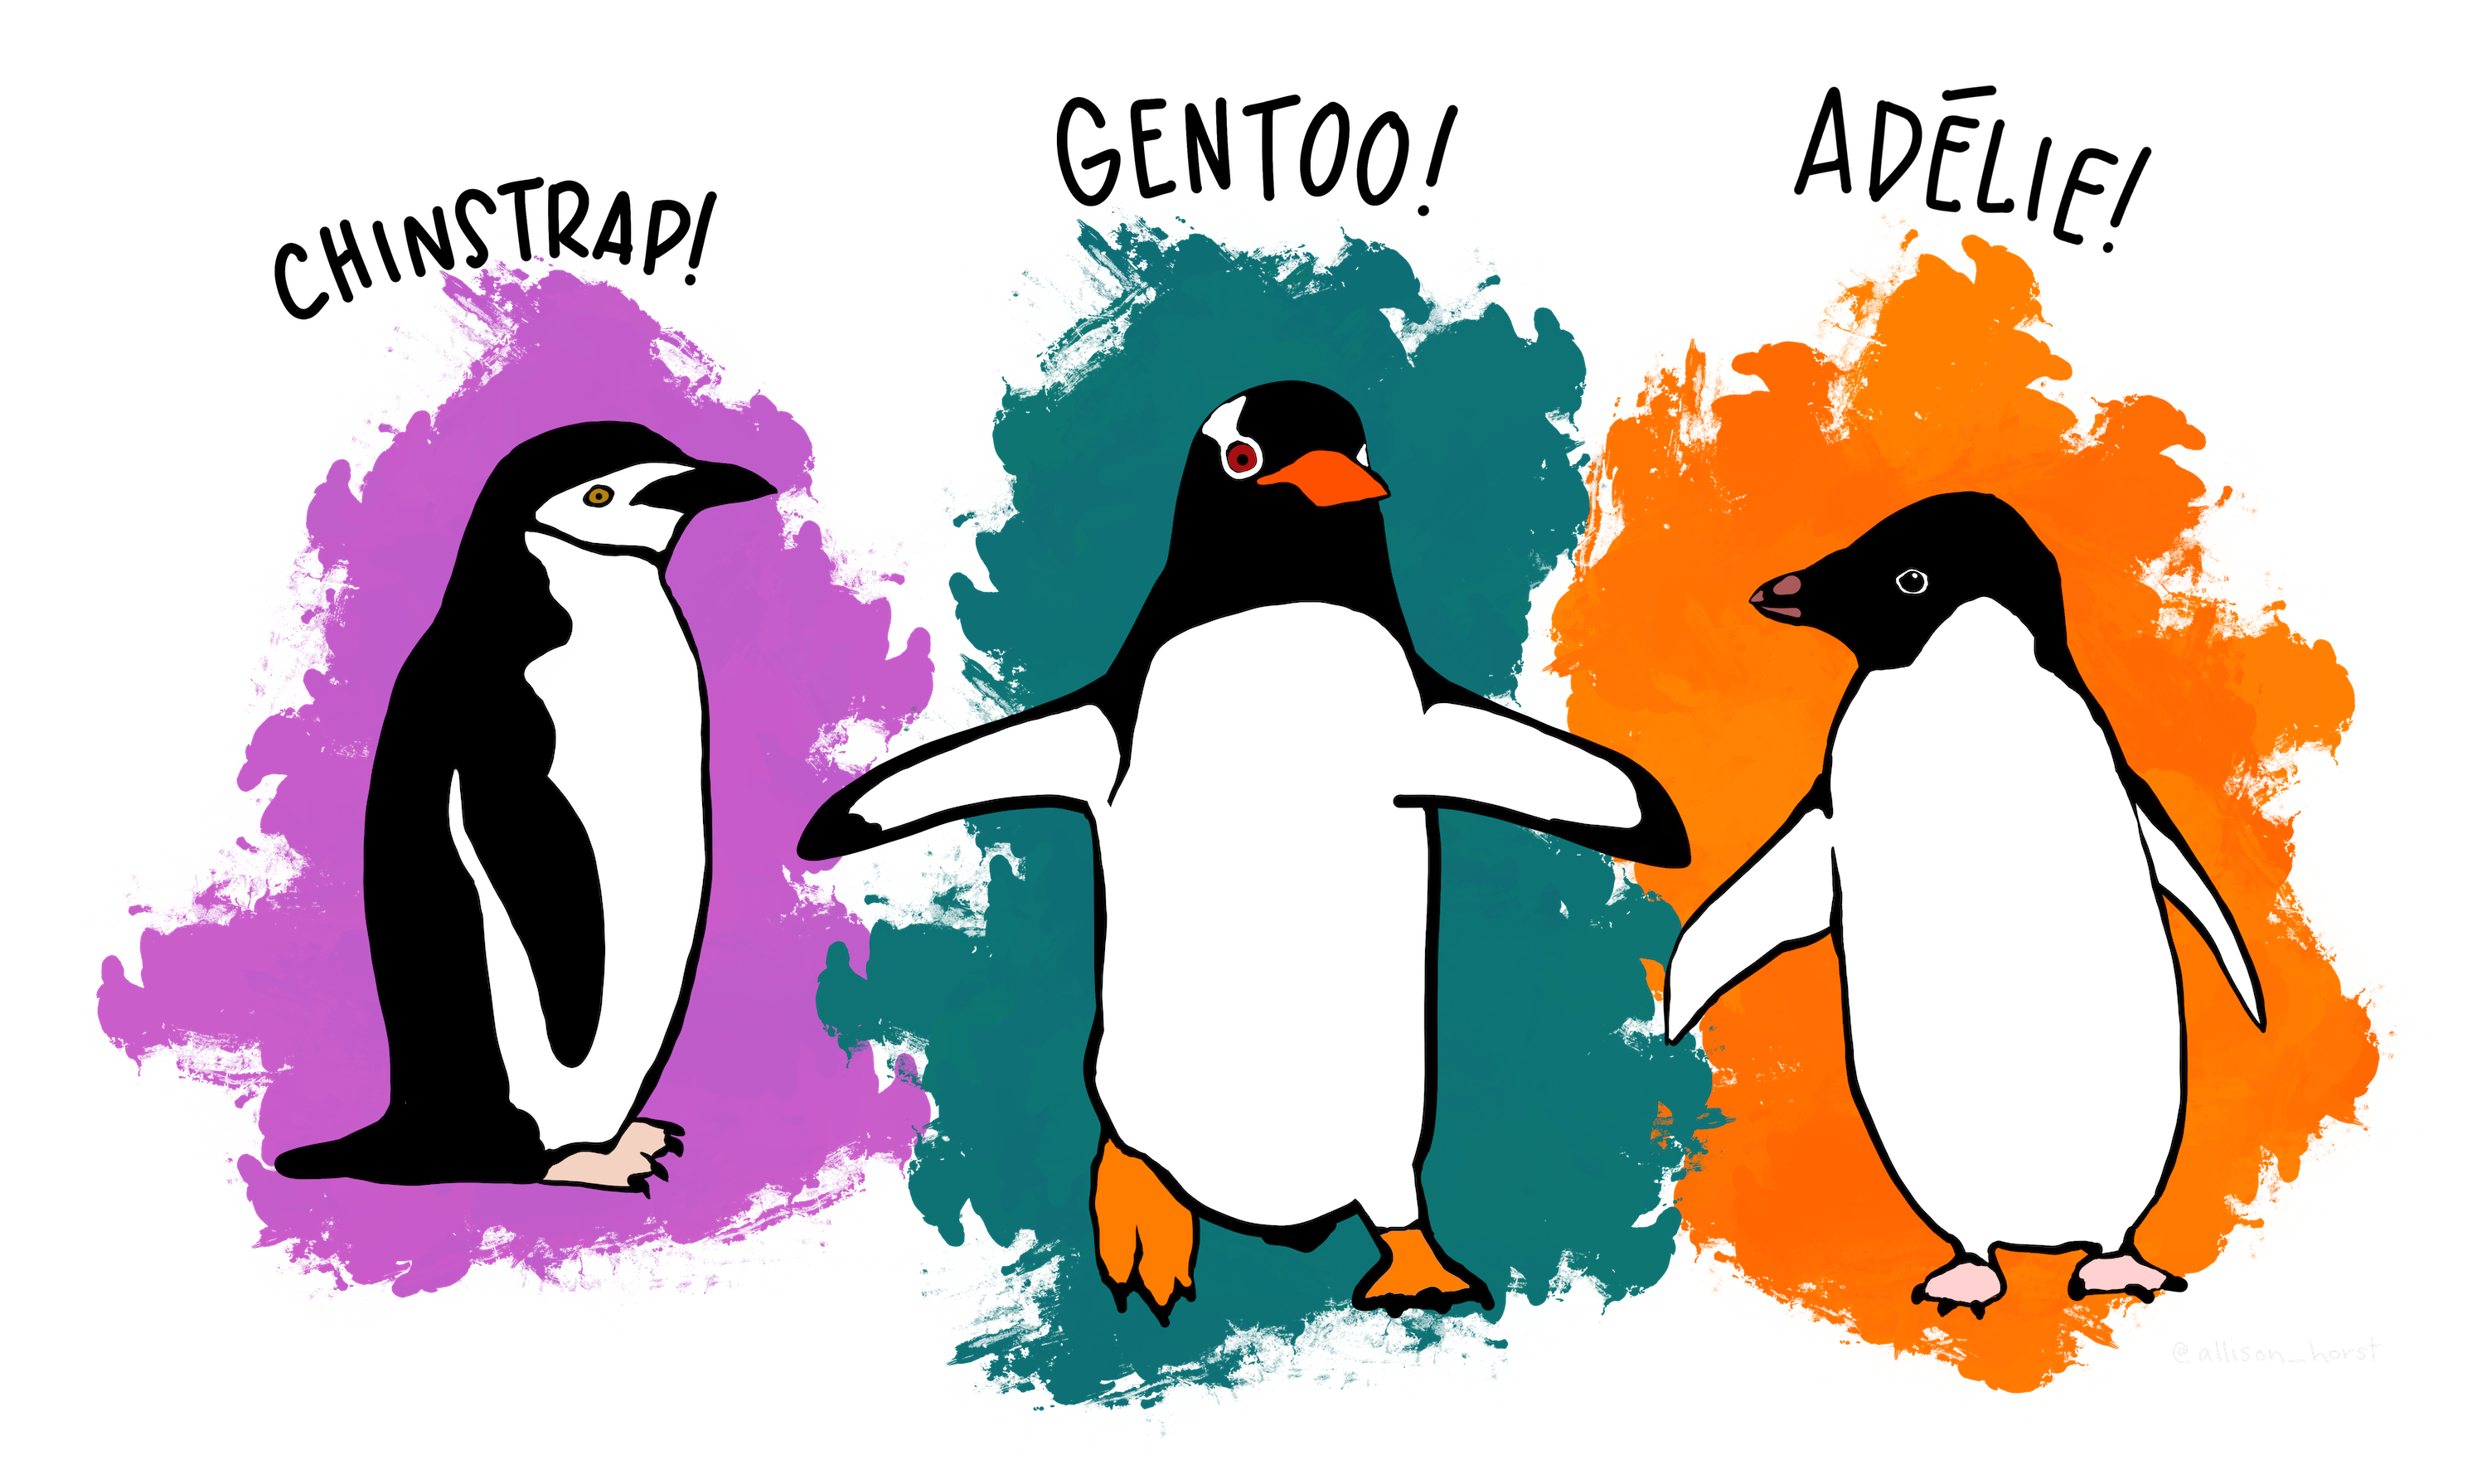

**About Dataset**

- The Palmer Archipelago (Antarctica) Penguins dataset contains data on three different species of penguins (Adelie, Chinstrap, and Gentoo) found in Antarctica's Palmer Archipelago.

- This dataset is quite popular for various research and educational uses, particularly for teaching and testing data analysis, statistical models, and machine learning algorithms.

- The dataset includes morphological measurements of the penguins; these measurements include the length and depth of their beaks, flipper (wing) length, and body weight. Additionally, information such as the penguin's species, island, and sex is provided for each observation.

- The Penguins dataset is a popular resource among data science and machine learning communities for both educational and research purposes. Moreover, this dataset is frequently used alongside the seaborn library.

- It is a sufficiently simple dataset to understand how classification results can change by tweaking hyperparameters.

- The data were collected and made available by Dr. Kristen Gorman and her team, members of the Antarctic Long-Term Ecological Research Network (LTER).

- **species**: Indicates the species of the penguin. Unique values: Adelie, Chinstrap, Gentoo.

- **island**: The island where the penguin was observed. Unique values: Biscoe, Dream, Torgersen.

- **culmen_length_mm**: The length of the penguin's culmen (in millimeters).

- **culmen_depth_mm**: The depth of the penguin's culmen (in millimeters).

- **flipper_length_mm**: The length of the penguin's flipper (in millimeters).

- **body_mass_g**: The body weight of the penguin (in grams).

- **sex**: The sex of the penguin.

**The goal is to create a model that can predict a penguin's species based on physical characteristics, thus aiding researchers in classifying penguins in the field without the need for an experienced biologist.**

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# import pygwalker as pyg #pip install pygwalker

In [2]:
df0 = pd.read_csv("penguins_size.csv")
df = df0.copy()

In [3]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
10/344

# Missing values for 3% of my data, I will drop them.

0.029069767441860465

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [12]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [13]:
unique_values(df, cat_features)

# Listing the unique categorical observations for object features. There is an incorrect categorical value "." in the 'Sex' feature.
# We need to remove this.

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [14]:
# Detecting the incorrect categorical value in the 'Sex' feature.
df[df["sex"]=="."]

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [15]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [16]:
df.loc[336, "sex"] = "MALE"

In [17]:
df.loc[336, "sex"]

'MALE'

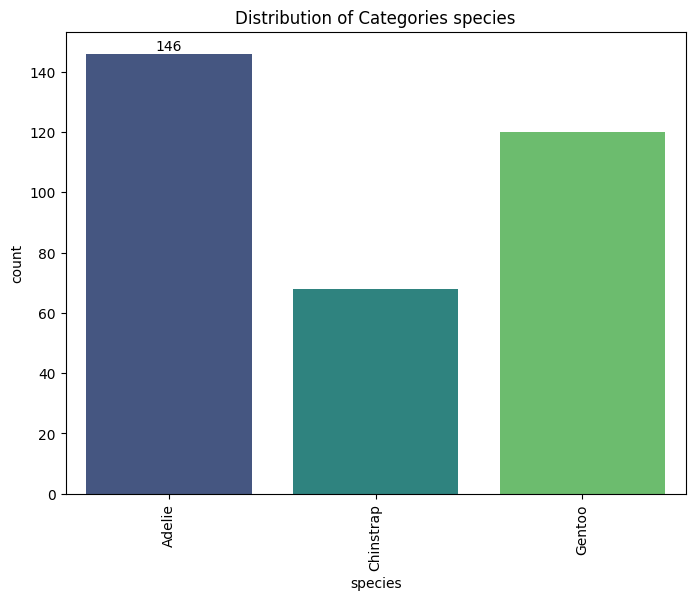

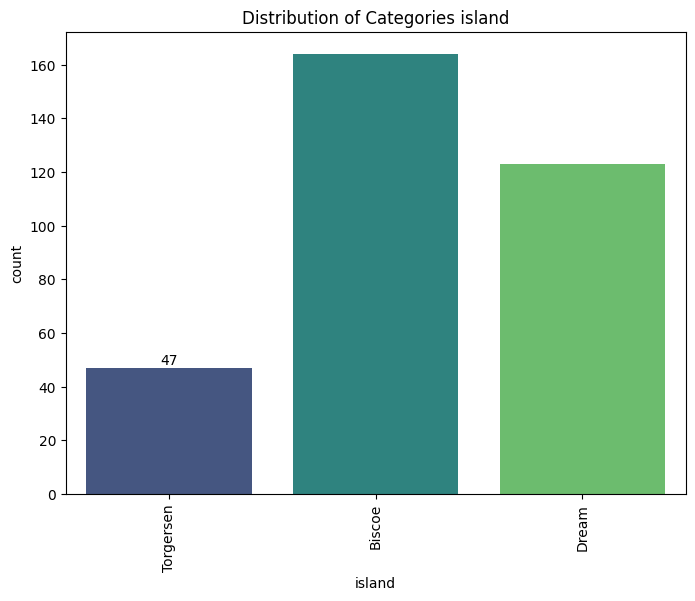

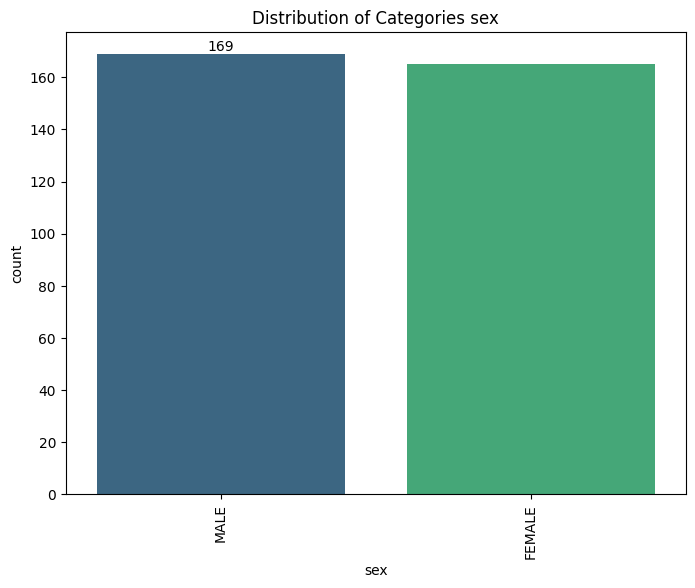

In [18]:
# To display the distribution of categorical features:

cat_features = df.select_dtypes(include='object').columns

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [19]:
df["species"].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

[Text(0, 0, '146'), Text(0, 0, '68'), Text(0, 0, '120')]

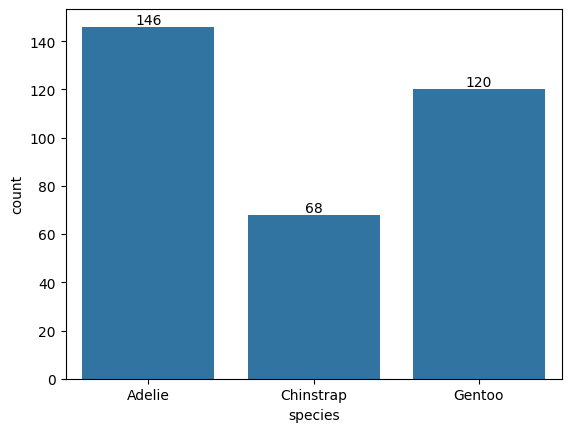

In [20]:
# There is an unbalanced situation in my data, but we will decide whether to handle the imbalance after reviewing the scores.
ax = sns.countplot(x="species", data=df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '73'), Text(0, 0, '34'), Text(0, 0, '58')]

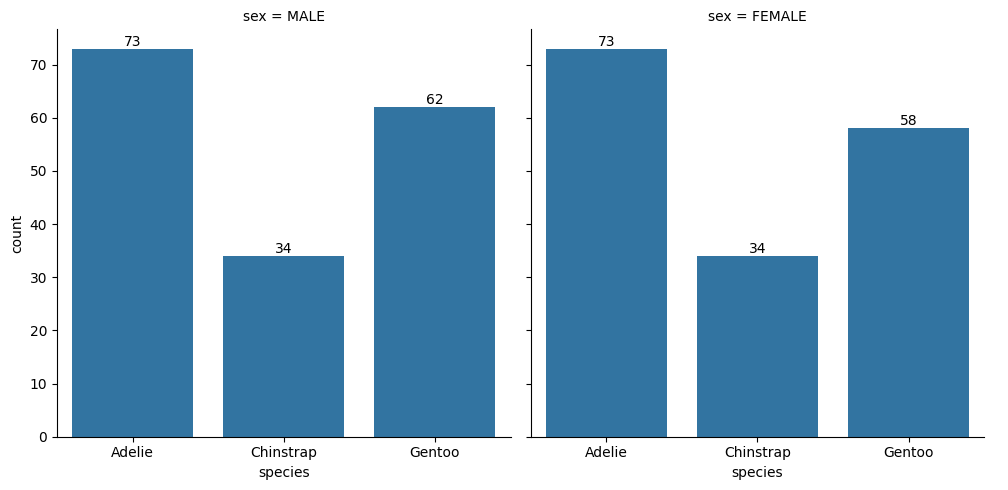

In [21]:
g = sns.catplot(x="species", data=df, kind="count", col="sex")

g.facet_axis(0, 0).bar_label(container=g.facet_axis(0, 0).containers[0])
g.facet_axis(0, 1).bar_label(container=g.facet_axis(0, 1).containers[0])

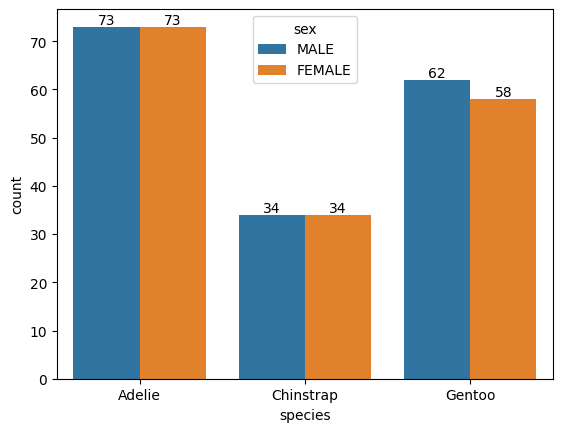

In [22]:
ax = sns.countplot(x="species", hue="sex", data=df)
for container in ax.containers:
    ax.bar_label(container)

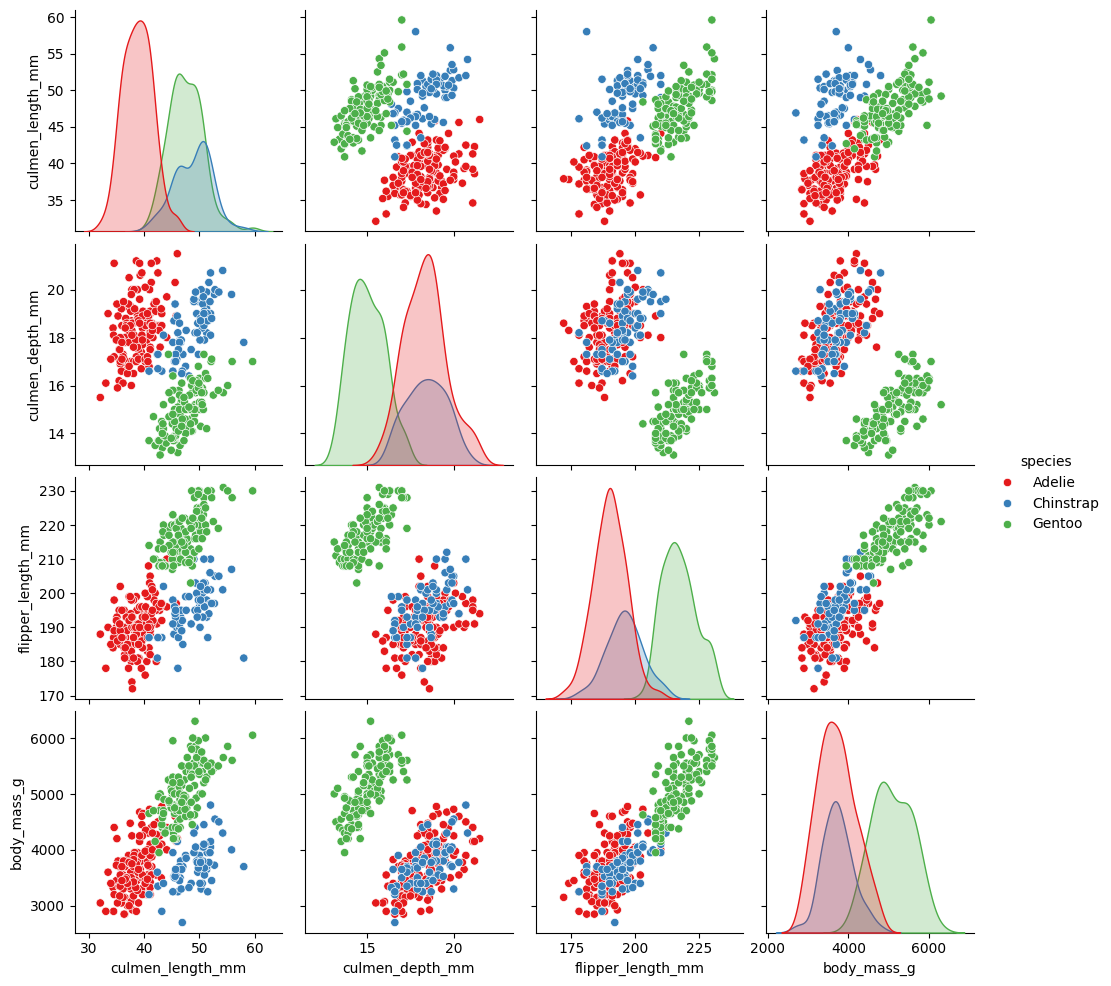

In [23]:
sns.pairplot(df, hue="species", palette="Set1");

# Here, we can see how distinctive each feature is and how the labels are separated based on specific features.

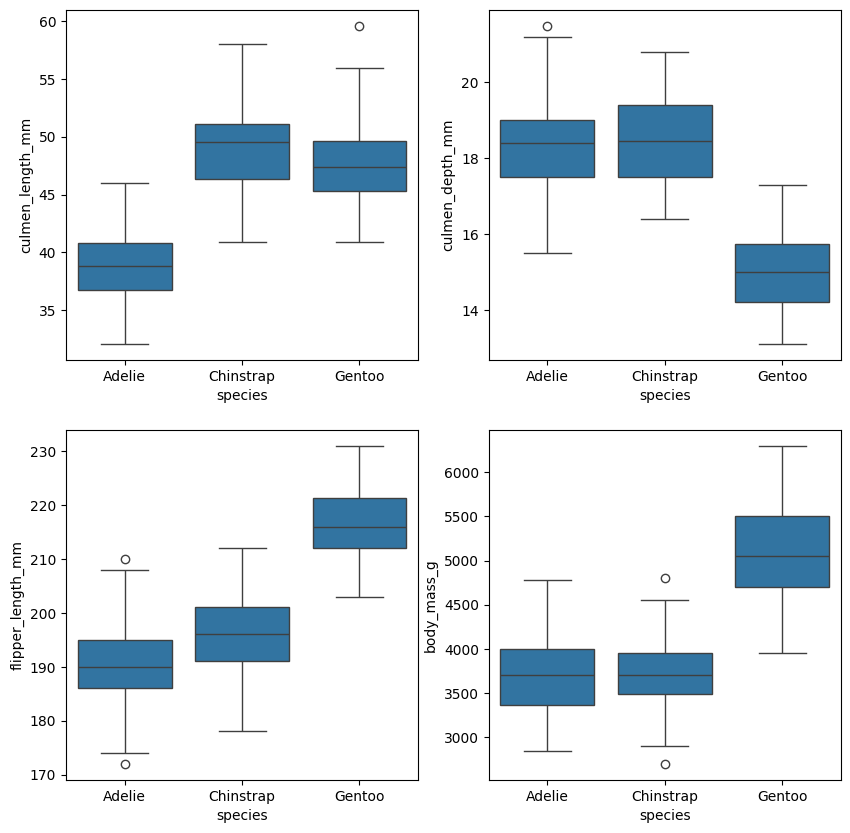

In [24]:
index = 0
plt.figure(figsize=(10, 10))
for feature in df.select_dtypes("number"):
    if feature != "species":
        index += 1
        plt.subplot(2, 2, index)
        sns.boxplot(x='species', y=feature, data=df)

In [25]:
import plotly.express as px

fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')

fig.update_layout(
    width=800,  
    height=600  
)

fig.show()

# When viewed in 3D, we can observe that the labels are well separated from each other.

In [26]:
num_features

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [27]:
df.select_dtypes("number")

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

In [28]:
corr_matrix = df.select_dtypes("number").corr()

fig = px.imshow(corr_matrix, 
                text_auto='.2f',
                aspect="auto",
                color_continuous_scale='viridis',
                title="Correlation Matrix")

fig.show()

# Multicollinearity is not a problem for tree-based models.

In [29]:
# plt.figure(figsize=(8,6))
# sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
# plt.title("Correlation Matrix")

# plt.show()

# Modelling

## Train | Test Split

In [30]:
X = df.drop(columns="species")
y = df['species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Ordinal Encoder

In [32]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [33]:
X_train[cat]

island     sex
293     Biscoe  FEMALE
183      Dream    MALE
211      Dream  FEMALE
193      Dream  FEMALE
134      Dream  FEMALE
..         ...     ...
108     Biscoe  FEMALE
1    Torgersen  FEMALE
53      Biscoe    MALE
67      Biscoe    MALE
44       Dream  FEMALE

[267 rows x 2 columns]

In [34]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [35]:
enc = OrdinalEncoder()

In [36]:
enc.fit_transform(X_train[cat])

array([[0., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [2., 1.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [2., 1.],
       [2., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [2., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.

In [37]:
X_train[cat] = enc.fit_transform(X_train[cat])
X_train[cat]

island  sex
293     0.0  0.0
183     1.0  1.0
211     1.0  0.0
193     1.0  0.0
134     1.0  0.0
..      ...  ...
108     0.0  0.0
1       2.0  0.0
53      0.0  1.0
67      0.0  1.0
44      1.0  0.0

[267 rows x 2 columns]

In [38]:
X_train.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
293     0.0              46.5             14.8              217.0   
183     1.0              54.2             20.8              201.0   
211     1.0              45.6             19.4              194.0   
193     1.0              46.2             17.5              187.0   
134     1.0              38.1             17.6              187.0   

     body_mass_g  sex  
293       5200.0  0.0  
183       4300.0  1.0  
211       3525.0  0.0  
193       3650.0  0.0  
134       3425.0  0.0

In [39]:

X_test[cat] = enc.transform(X_test[cat]) # we don't fit in test data
X_test[cat]

island  sex
89      1.0  0.0
143     1.0  1.0
341     0.0  1.0
256     0.0  0.0
252     0.0  0.0
..      ...  ...
280     0.0  0.0
153     1.0  1.0
195     1.0  0.0
334     0.0  0.0
307     0.0  1.0

[67 rows x 2 columns]

## Modelling with Pipeline & ColumnTransformer

**make_column_transformer Function**

 - **transformerX**: The transformation to be applied. For example, it can be one of the scikit-learn transformation classes like **OneHotEncoder**, **StandardScaler**, etc.
- **columnsX**: The names or indices of the columns to which the transformation will be applied. Specified as a list.

**remainder Parameter**

- Defines the operation to be applied to columns not explicitly specified in the transformer. It can take two main values:

  - **drop**: When this value is used, columns not mentioned in the transformer are removed from the result. This is useful when you want to transform only specific columns and ignore the rest.
  
  - **passthrough**: When this value is used, columns not mentioned remain unchanged in the result. This is used when you want to apply transformations to certain columns while leaving others unchanged.

- **MinMaxScaler() or StandardScaler()**: Scaling is applied to all features except those that are not transformed.

**handle_unknown Parameter**

- Used in certain transformations like **OneHotEncoder** or **OrdinalEncoder** and determines how to handle unseen categorical values in the training data. It can take two main values:

  - **error**: If an unseen value is encountered during the transformation, it raises an error. This helps in identifying unexpected values early on.
  
  - **ignore**: If an unseen value is encountered, it ignores the value and continues with the transformation. This helps in making the model resilient to unseen values.


Using **make_column_transformer** makes the data preprocessing process more organized and manageable. This allows you to easily apply specific transformations on different types of data, preparing your dataset for machine learning models.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

# Since our train and test sets have been converted to numeric forms above, 
# we are splitting the original data again into train and test sets to revert them to their original forms.

In [41]:
X_test.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
89    Dream              38.9             18.8              190.0   
143   Dream              40.7             17.0              190.0   
341  Biscoe              50.4             15.7              222.0   
256  Biscoe              42.6             13.7              213.0   
252  Biscoe              45.1             14.5              207.0   

     body_mass_g     sex  
89        3600.0  FEMALE  
143       3725.0    MALE  
341       5750.0    MALE  
256       4950.0  FEMALE  
252       5050.0  FEMALE

In [42]:
from sklearn.compose import make_column_transformer

In [43]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough") # default= remainder = 'drop'

# The make_column_transformer function automates the transformations applied to features. 
# It applies transformations to features in the order specified inside the function.

# In the OrdinalEncoder algorithm, the handle_unknown parameter is set to "error" by default. 
# If we leave it as "error", the algorithm will raise an error when encountering a categorical value in the test data that wasn't present in the train data.

# However, if handle_unknown='use_encoded_value' and unknown_value=-1 are set, 
# a categorical value from the test data that wasn't present in the training data will be assigned a value of -1.
# The reason for using unknown_value=-1 is to ensure that the same number is not assigned to other categorical values.

# The function make_column_transformer((ord_enc, cat), remainder='passthrough') will convert the categorical features defined in 'cat' to 
# numeric values using the ordinal encoder, while leaving the numeric features unchanged with the remainder="passthrough" parameter.

# remainder='passthrough' means that all features not undergoing transformation will remain unchanged.

# If the default value of remainder="drop" is used, all features that are not transformed will be dropped from the dataframe.
# If remainder=MinMaxScaler() or StandardScaler() is used, scaling will be applied to all features except those that are not transformed.

# The make_column_transformer function modifies the structure of the data.
# Categorical features are rearranged to appear first in the dataframe, followed by the numeric features.

In [44]:
pd.DataFrame(column_trans.fit_transform(X_train))

0    1     2     3      4       5
0    0.0  0.0  46.5  14.8  217.0  5200.0
1    1.0  1.0  54.2  20.8  201.0  4300.0
2    1.0  0.0  45.6  19.4  194.0  3525.0
3    1.0  0.0  46.2  17.5  187.0  3650.0
4    1.0  0.0  38.1  17.6  187.0  3425.0
..   ...  ...   ...   ...    ...     ...
262  0.0  0.0  38.1  17.0  181.0  3175.0
263  2.0  0.0  39.5  17.4  186.0  3800.0
264  0.0  1.0  42.0  19.5  200.0  4050.0
265  0.0  1.0  41.1  19.1  188.0  4100.0
266  1.0  0.0  37.0  16.9  185.0  3000.0

[267 rows x 6 columns]

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [46]:
operations = [("OrdinalEncoder", column_trans), ("DT_model",  DecisionTreeClassifier(random_state=101)) ]

pipe_model = Pipeline(steps = operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model', DecisionTreeClassifier(random_state=101))])

## Model Performance

**Overfitting Issue in Decision Tree Algorithm**

- Decision trees are prone to overfitting, which is one of the biggest drawbacks of their modeling structure.
- Although the scores below do not show any overfitting, excessive branching can lead to overfitting.
- As the branching increases in decision trees, the risk of the model overfitting to the training data and reducing its generalizability also increases.

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# The predict operation transforms the test data according to the unique categorical values from the train data,
# converting them into numeric values.

# Since make_column_transform is part of the pipeline, the dataframe structure is modified in the same way as the train data 
# and is then passed to the relevant model for prediction.

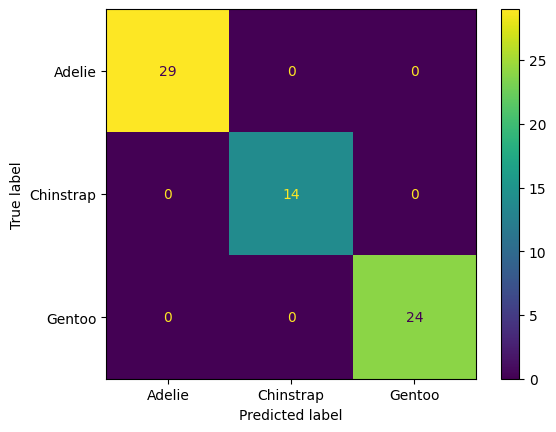

In [48]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

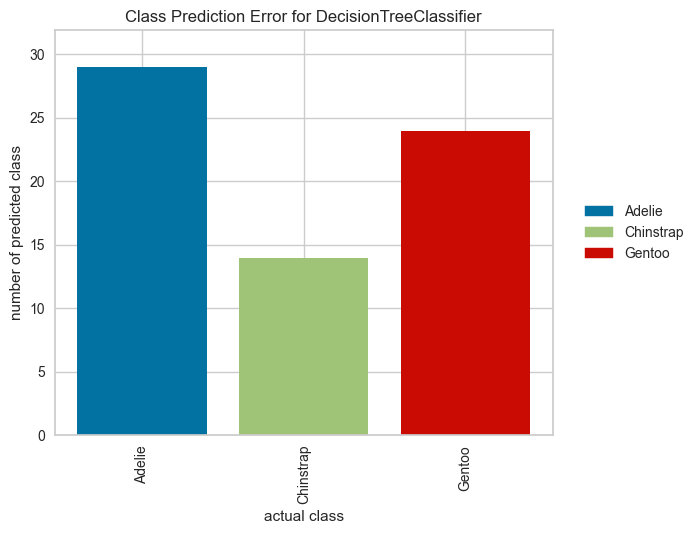

In [49]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();
# The classpredictionerror function displays the errors made on a per-class basis.

In [50]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



# Cross Validation (CV) & Evaluating ROC Curves and AUC

- We will evaluate whether CV scores are similar to the overall scores of the model.
- In multiclass scenarios, average scores are typically considered rather than class-specific scores.

**Evaluation Metrics:**
- **Micro Average**: Used when scores are balanced across all classes. Measures overall performance across all classes.
- **Macro Average**: Preferred when there is an imbalance in the dataset. Evaluates the performance of all classes with equal weight.
- **Weighted Average**: Used when the dataset is imbalanced but the evaluation is to be weighted based on the class frequency. Provides a weighted average based on class frequencies.

These metrics allow for fair and accurate evaluations in multiclass classification problems, considering the imbalance and importance of different classes. They enable a comprehensive assessment of the overall model performance, taking into account the impact of each class on the model's performance in different ways.

In [51]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [52]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.973789
train_accuracy           1.000000
test_precision_micro     0.973789
train_precision_micro    1.000000
test_recall_micro        0.973789
train_recall_micro       1.000000
test_f1_micro            0.973789
train_f1_micro           1.000000
dtype: float64

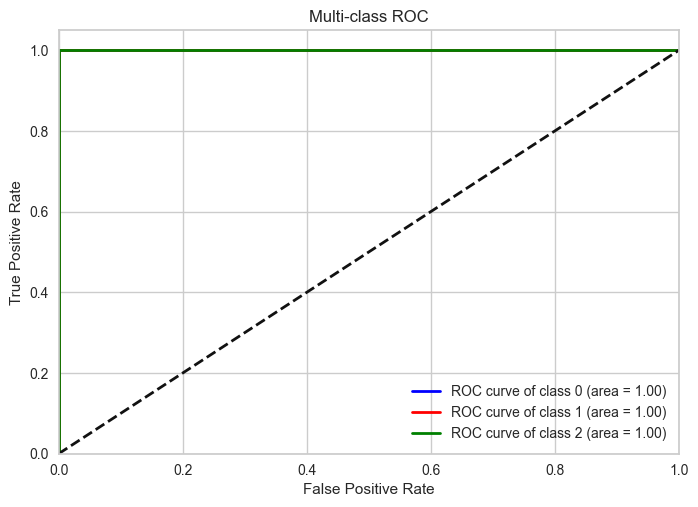

In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Train the model
model.fit(X_train, y_train)

# Convert the target variable to binary format
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [54]:
column_trans.get_feature_names_out()

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

## Overfitting Risk and Features Importance in Decision Trees
DT can carry the risk of overfitting due to excessive dependence on certain features.

DT uses a method based on average classification gain to determine the importance of features.

- **Example Scenario**: Features like wing length and beak length might be 90% important for the model.
- **Effect**: DT can become overly reliant on such critical features that differentiate a large portion of the data, making other features insignificant. This leads to missing potential insights from those less emphasized features.
- **Overfitting Risk**: As model complexity increases, the risk of overfitting also rises. Excessive dependence on a few key features reduces the model's generalizability and can result in overfitting.

This highlights the importance of ensuring the model evaluates all features in the dataset in a balanced manner and avoids overfitting. Particularly, making decisions based on only a few features can negatively impact overall performance. Therefore, balanced feature selection and complexity control are crucial when building a model.


In [55]:
cat

Index(['island', 'sex'], dtype='object')

In [56]:
pipe_model["DT_model"].feature_importances_

# Since we are using a pipeline, first extract ML model from the pipeline using pipe_model["DT_model"]
# and then use the feature_importance_ method to assign percentage-based importance scores to all features, ensuring they sum up to 1.
# The feature with the highest importance score is the most important, while the one with the lowest score is the least important.

# The make_column_transformer function used within the pipe_model changes the order of features in the dataframe (df),
# so in the output below, the first two importance scores belong to categorical features, 
# while the remaining scores correspond to numeric features.

# If the make_column_transformer function were not used within the pipeline, the feature order of the dataframe (df would remain unchanged. 
# Remember that the order changes only when the make_column_transformer function is applied.

# Feature importance is calculated after achieving the best model scores.
# In this specific dataset, since the default hyperparameters of the DT model already provided very high scores,
# we performed feature importance without using grid search.
# However, ideally, feature importance should be conducted using the best hyperparameters identified after grid search.


array([0.03642845, 0.0319712 , 0.34285687, 0.06856954, 0.51430167,
       0.00587226])

In [57]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [58]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train), columns=features).head()

ordinalencoder__island  ordinalencoder__sex  remainder__culmen_length_mm  \
0                     0.0                  0.0                         46.5   
1                     1.0                  1.0                         54.2   
2                     1.0                  0.0                         45.6   
3                     1.0                  0.0                         46.2   
4                     1.0                  0.0                         38.1   

   remainder__culmen_depth_mm  remainder__flipper_length_mm  \
0                        14.8                         217.0   
1                        20.8                         201.0   
2                        19.4                         194.0   
3                        17.5                         187.0   
4                        17.6                         187.0   

   remainder__body_mass_g  
0                  5200.0  
1                  4300.0  
2                  3525.0  
3                  3650.0  
4                  3425.0

In [59]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features
# Removing the prefixes from the features.
# Sorting the features into a list and assigning this order to the new_features variable.
# This feature order will be used in the feature importance ranking.

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [60]:
df_fi = pd.DataFrame(pipe_model["DT_model"].feature_importances_, index= new_features, columns=["Feature Importance"])

df_fi =df_fi.sort_values("Feature Importance", ascending=False)

df_fi

# We defined the dataframe showing feature importance ratios as df_fi.
# Using pipe_model["DT_model"].feature_importances_, we assign the feature importance ratios 
# and the feature names (new_features), whose order was changed after make_column_transform, to the index of the dataframe.

Feature Importance
flipper_length_mm            0.514302
culmen_length_mm             0.342857
culmen_depth_mm              0.068570
island                       0.036428
sex                          0.031971
body_mass_g                  0.005872

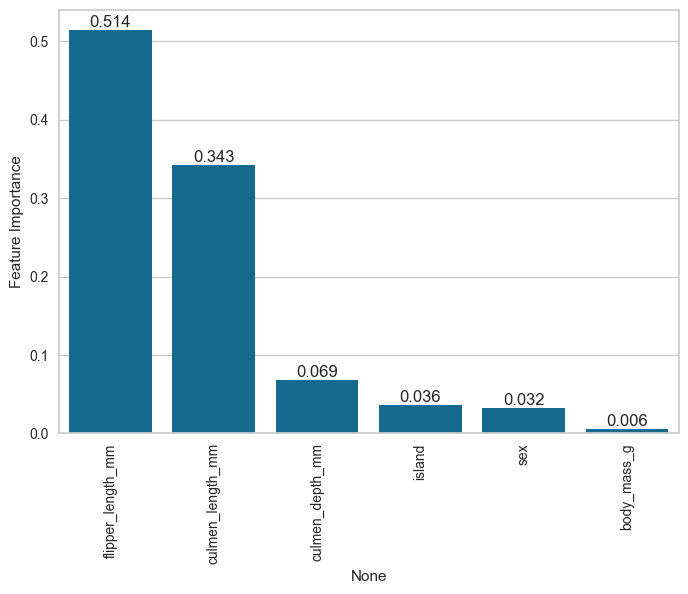

In [61]:
ax =sns.barplot(x = df_fi.index, y = 'Feature Importance', data = df_fi)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.show();

**Feature Selection and Limitations in Decision Tree**

DT tends to focus on features deemed most important in the model.

**Feature Selection and DT's Limitations**
- **Example**: Wing length and beak length may be identified as the most important features for a DT.
- **Effect**: DT can prioritize such key features while ignoring others, similar to the approach of Lasso regression.
- **Limitation**: This can lead to overlooking insights that could be gained from other features.

**Comparison: Random Forest and Ridge**
- **Random Forest**: A model that extracts insights from all features, resembling Ridge regression in its approach.
- **Lasso vs DT**: Like Lasso, DT gives weight to features considered important in the model while reducing others.
- **Conclusion**: This behavior of Decision Trees can result in an imbalanced evaluation of all features in the dataset. Therefore, it is essential to consider all features when building a model and, when necessary, use more balanced models (e.g., Random Forest).

In [62]:
X2 = X.drop(columns = ["flipper_length_mm"])

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, random_state= 101)

In [64]:
operations = [("OrdinalEncoder", column_trans), ("DT_model2", DecisionTreeClassifier(random_state=101))]

pipe_model2 =Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model2', DecisionTreeClassifier(random_state=101))])

In [65]:
eval_metric(pipe_model2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28  1  0]
 [ 1 18  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.95      0.95      0.95        19
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67


Train_Set
[[117   0   0]
 [  0  49   0]
 [  0   0 101]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        49
      Gentoo       1.00      1.00      1.00       101

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [66]:
operations = [("OrdinalEncoder", column_trans), ("DT_model2", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.9849
train_accuracy           1.0000
test_precision_micro     0.9849
train_precision_micro    1.0000
test_recall_micro        0.9849
train_recall_micro       1.0000
test_f1_micro            0.9849
train_f1_micro           1.0000
dtype: float64

In [67]:
decision_tree_model = pipe_model2.named_steps["DT_model2"]

feature_importances = decision_tree_model.feature_importances_

df2_fi = pd.DataFrame(data=feature_importances, index=X_train2.columns, columns=["Feature Importance"])

df2_fi = df2_fi.sort_values(by="Feature Importance", ascending=False)

df2_fi

Feature Importance
culmen_depth_mm             0.501557
island                      0.431050
body_mass_g                 0.057899
sex                         0.009494
culmen_length_mm            0.000000

In [ ]:
def get_feature_importances(model, features):
    feature_importances = model.feature_importances_
    
    df_feature_importances = pd.DataFrame(data=feature_importances, index=features, columns=["Feature Importance"])
    
    # Sort Features by Importance
    df_feature_importances = df_feature_importances.sort_values(by="Feature Importance", ascending=False)
    
    return df_feature_importances

df_feature_importances_model2 = get_feature_importances(pipe_model2.named_steps["DT_model2"], X_train2.columns)

df_feature_importances_model = get_feature_importances(pipe_model.named_steps["DT_model"], new_features)

print("Feature Importance for Model 2:")
print(df_feature_importances_model2)

print("\nFeature Importance for Model 1:")
print(df_feature_importances_model)

Model 2 için Özellik Önemleri:
                  Feature Importance
culmen_depth_mm             0.501557
island                      0.431050
body_mass_g                 0.057899
sex                         0.009494
culmen_length_mm            0.000000

Model 1 için Özellik Önemleri:
                   Feature Importance
flipper_length_mm            0.514302
culmen_length_mm             0.342857
culmen_depth_mm              0.068570
island                       0.036428
sex                          0.031971
body_mass_g                  0.005872


## Score Evaluation in Multiclass Datasets

In multiclass datasets, a specialized approach is required to evaluate the precision, recall, and F1 scores of individual classes.

**Manual Score Evaluation Method**

- **Objective**: To calculate precision, recall, and F1 scores for each class in a multiclass dataset individually.
- **Approach**: Using the `make_scorer` function, a custom scoring function is created to compute scores for a specific class.
- **Implementation**: The custom scoring function is applied during cross-validation or other evaluation processes of the model.
- **Outcome**: This method helps us gain a more detailed understanding of the model's performance for each class in multiclass datasets.

This approach is particularly useful for evaluating the performance of each class in multiclass classification problems. It is especially important for understanding the model's precision and recall capabilities for individual classes.

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
label_encoder = LabelEncoder()

In [71]:
df["species_encode"] = label_encoder.fit_transform(df["species"])

In [72]:
print(df[["species", "species_encode"]].sample(5))

       species  species_encode
304     Gentoo               2
33      Adelie               0
191  Chinstrap               1
143     Adelie               0
249     Gentoo               2


In [73]:
label_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [74]:
y2 = df["species_encode"]

In [75]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y2, test_size = 0.2, stratify= y2, random_state=101)

In [76]:
from sklearn.metrics import make_scorer

In [77]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scoring = {
    'precision-Adelie': make_scorer(precision_score, average=None, labels=[0]),  # 'Adelie' -> 0
    'recall-Adelie': make_scorer(recall_score, average=None, labels=[0]),  # 'Adelie' -> 0
    'f1-Adelie': make_scorer(f1_score, average=None, labels=[0]),  # 'Adelie' -> 0
    
    'precision-Chinstrap': make_scorer(precision_score, average=None, labels=[1]),  # 'Chinstrap' -> 1
    'recall-Chinstrap': make_scorer(recall_score, average=None, labels=[1]),  # 'Chinstrap' -> 1
    'f1-Chinstrap': make_scorer(f1_score, average=None, labels=[1]),  # 'Chinstrap' -> 1
    
    'precision-Gentoo': make_scorer(precision_score, average=None, labels=[2]),  # 'Gentoo' -> 2
    'recall-Gentoo': make_scorer(recall_score, average=None, labels=[2]),  # 'Gentoo' -> 2
    'f1-Gentoo': make_scorer(f1_score, average=None, labels=[2])  # 'Gentoo' -> 2
}

In [78]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie        0.983217
train_precision-Adelie       1.000000
test_recall-Adelie           0.957576
train_recall-Adelie          1.000000
test_f1-Adelie               0.969123
train_f1-Adelie              1.000000
test_precision-Chinstrap     0.957143
train_precision-Chinstrap    1.000000
test_recall-Chinstrap        0.980000
train_recall-Chinstrap       1.000000
test_f1-Chinstrap            0.964530
train_f1-Chinstrap           1.000000
test_precision-Gentoo        0.980909
train_precision-Gentoo       1.000000
test_recall-Gentoo           0.988889
train_recall-Gentoo          1.000000
test_f1-Gentoo               0.984093
train_f1-Gentoo              1.000000
dtype: float64

## Visualize the Tree

In [79]:
from sklearn.tree import plot_tree

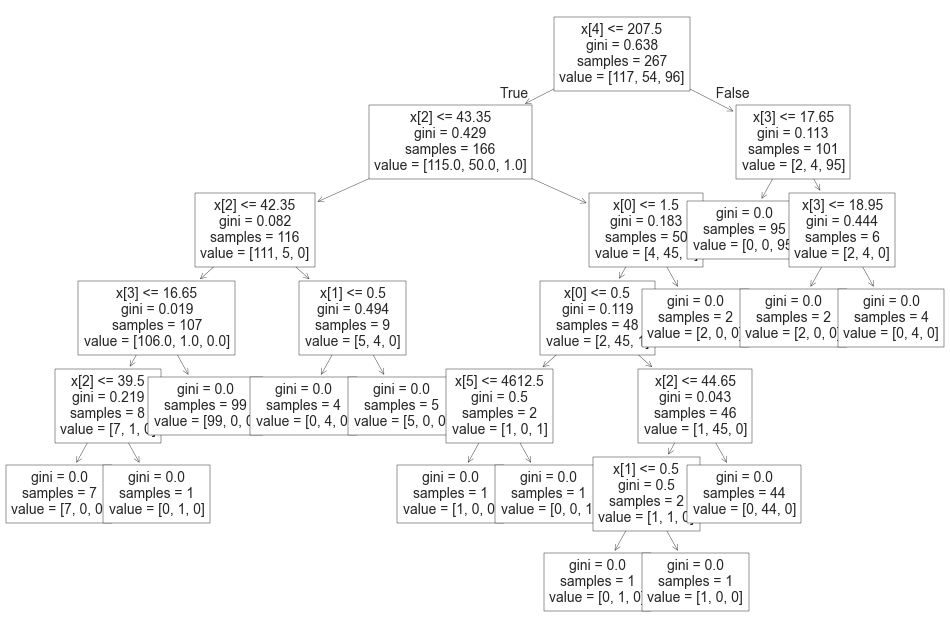

In [80]:
plt.figure(figsize= (12,8))

plot_tree(pipe_model["DT_model"], fontsize=10);

# When we provide the model to plot_tree, it shows which features and their value ranges are used for the leaf splits.
# To make the visualization more understandable, we also need to define the feature names and class names.

In [81]:
pd.set_option('display.max_rows', 500)
X_train.flipper_length_mm.sort_values().unique()

array([172., 174., 176., 178., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 205., 206., 207., 208., 209.,
       210., 211., 212., 213., 214., 215., 216., 217., 218., 219., 220.,
       221., 222., 223., 224., 225., 226., 228., 229., 230., 231.])

In [82]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

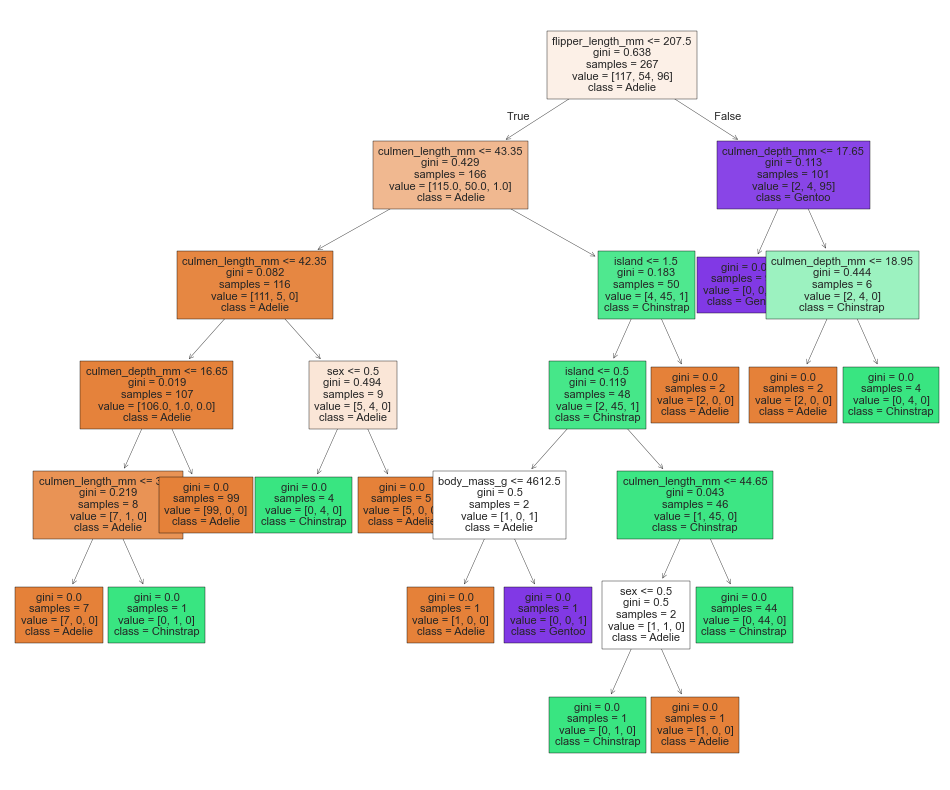

In [83]:
plt.figure(figsize=(12, 10), dpi=100)
plot_tree(pipe_model["DT_model"],
          filled=True,
          feature_names=new_features,
          class_names=y.unique().tolist(),
          fontsize=8);


# The lower the gini value, the more observations in that leaf belong to a similar class.
# If gini is 0, it indicates that all observations in that leaf belong to the same class.
# The maximum gini value in a leaf can be 1 - 1/n (n=number of classes). For this dataset, the maximum value can be 1 - 1/3 = 0.67.
# A maximum gini value indicates that there is a large number of observations from every class.

# In the DT model, the splitting condition (splitter) is based on the best feature by default, so in this visualization, 
# the first leaf splits based on the feature "flipper_length_mm," which contributes the most to the model's predictions.
# The "samples" in the first leaf represent the total number of observations in the training dataset, while "value" 
# indicates the number of observations in each class, sorted alphabetically or numerically.

# The number of "samples" in other leaves shows how many observations fall into that leaf after splitting, while "value"
# represents the number of observations from each class in that leaf.

# "class" shows which class the model assigns to the observations that fall into that leaf.

## Understanding and Evaluating Hyperparameters in Decision Trees

### **Important Hyperparameters in Decision Trees and Their Effects on the Model**

**Key Hyperparameters**
- **`max_depth`**: The maximum depth of the tree. Higher values make the model more complex, potentially leading to overfitting. Setting it to `None` allows the tree to keep splitting until no errors remain.
- **`min_samples_split`**: The minimum number of samples required to split a node. Higher values restrict splits, resulting in a simpler model.
- **`min_samples_leaf`**: The minimum number of observations required for a node to be considered a leaf. Higher values make the tree less detailed.
- **`criterion`**: The function used to measure the quality of splits (`'gini'` or `'entropy'`).
- **`splitter`**: The splitting strategy (`'best'` or `'random'`).
- **`max_features`**: The maximum number of features considered at each split.
- **`max_leaf_nodes`**: The maximum number of leaf nodes.
- **`min_impurity_decrease`**: The minimum impurity decrease required to split a node.
- **`class_weight`**: The weights assigned to the classes.

#### **Effects on Model Performance**
These hyperparameters influence the complexity, level of detail, and generalization capability of the model.

Key parameters like **`max_depth`**, **`min_samples_split`**, and **`min_samples_leaf`** play a significant role in managing the balance between training and test data performance, thereby mitigating the risk of overfitting.

#### **Optimization Tip**
It is recommended to determine the optimal values for these parameters using techniques like **grid search**.

In [84]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["DT_model"], filled=True, feature_names=new_features, class_names = y.unique().tolist(), fontsize=10);

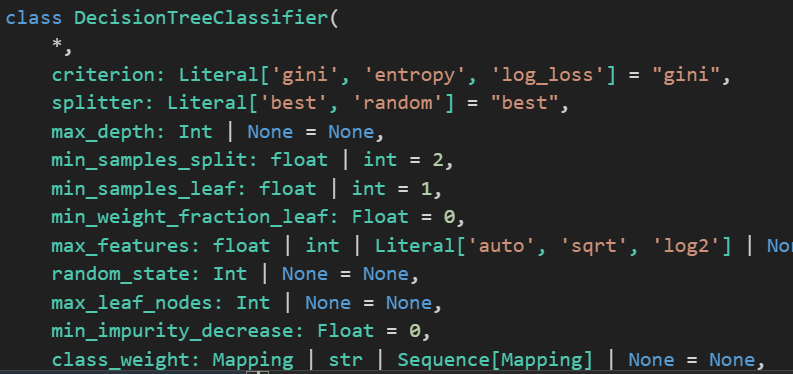

### max_depth & Pruned Tree

### **`max_depth`**
- **Purpose**: Determines how deep the tree can grow. For example, *`max_depth=2`* allows the tree to split into two levels.

- **Effect**:
  - *`max_depth=None`*: Allows the tree to split until it perfectly classifies the training set without errors, which can lead to overfitting.
  - This parameter can be used to intentionally introduce bias in the training set to improve the model's performance on the test set.

In [85]:
DT_model = DecisionTreeClassifier(max_depth=3, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=3, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  5  49   0]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97       117
   Chinstrap       0.94      0.91      0.92        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.97       267
   macro avg       0.97      0.96      0.96       267
weighted avg       0.97      0.97      0.97       267



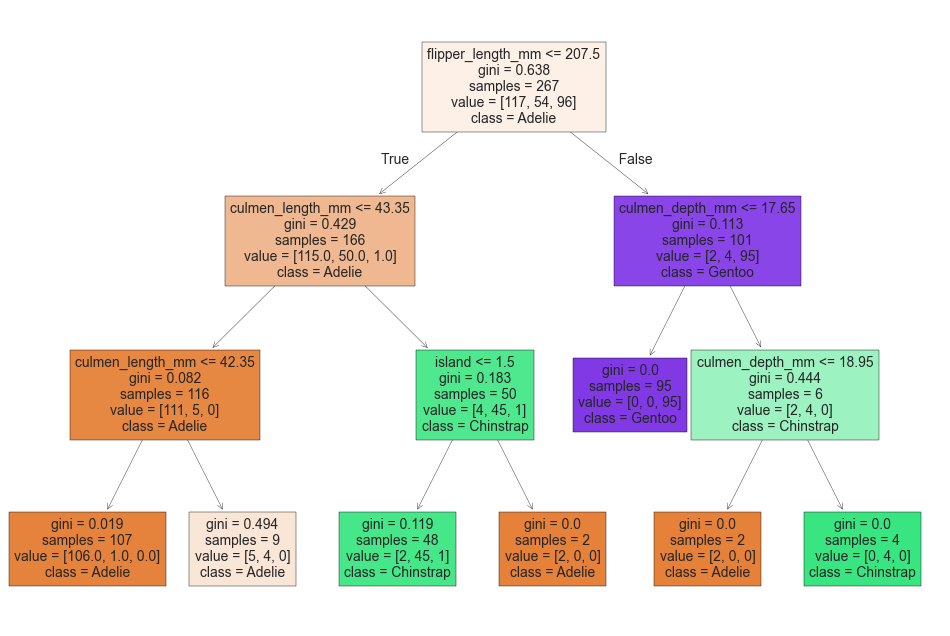

In [86]:
report_model(pruned_tree )

In [87]:
DT_model = DecisionTreeClassifier(max_depth=2, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
pruned_tree2 = Pipeline(steps=operations)
pruned_tree2.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(max_depth=2, random_state=101))])

### min_samples_split

The **`min_samples_split`** parameter is important for improving the model's generalization ability and ensuring that it is not overly affected by small variations in the dataset.

This parameter is specifically used to prevent the decision tree from becoming overly sensitive to noise or minor changes in the training dataset.




Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  6  48   0]
 [  1   0  95]]


              precision    recall  f1-score   support

      Adelie       0.94      0.98      0.96       117
   Chinstrap       0.96      0.89      0.92        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.97       267
   macro avg       0.97      0.95      0.96       267
weighted avg       0.97      0.97      0.97       267



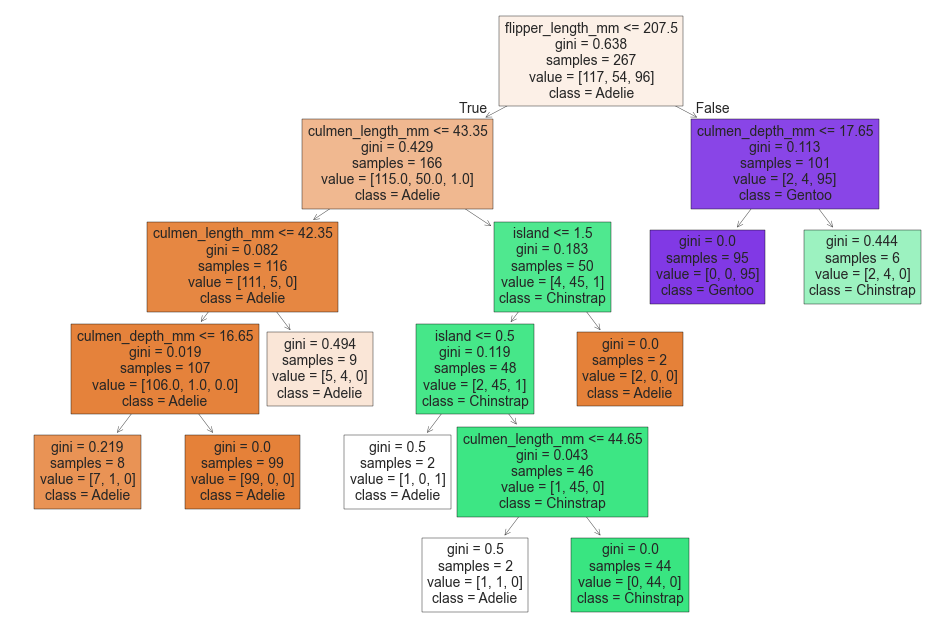

In [88]:
DT_model = DecisionTreeClassifier(min_samples_split=10, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 1  0 23]]


              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[115   2   0]
 [  1  53   0]
 [  1   0  95]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98       117
   Chinstrap       0.96      0.98      0.97        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.99       267
   macro avg       0.98      0.98      0.98       267
weighted avg       0.99      0.99      0.99       267



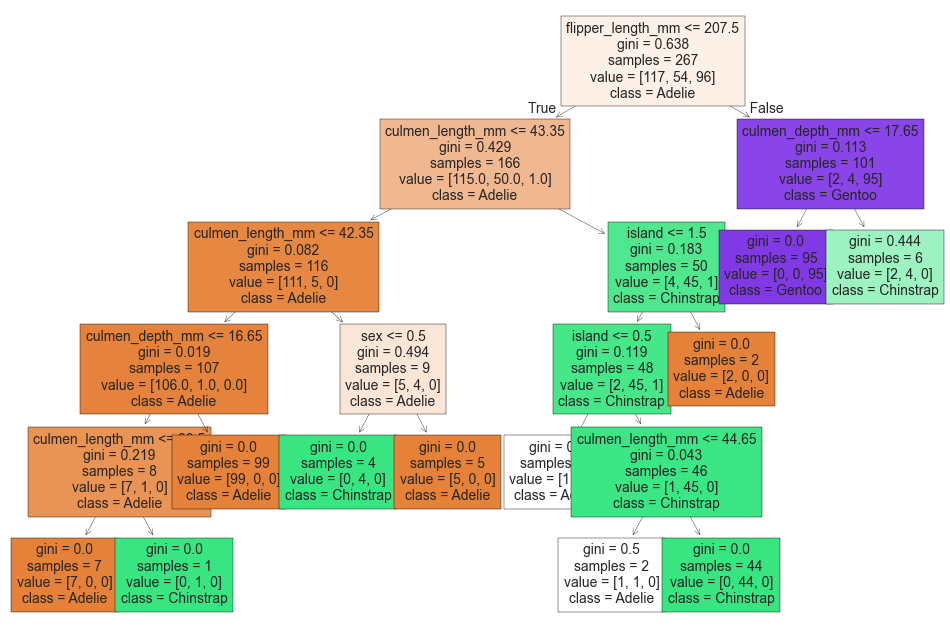

In [89]:
DT_model = DecisionTreeClassifier(min_samples_split=7, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)

### min_samples_leaf
- **Purpose**: Determines the minimum number of observations required for a node to be considered a leaf.

- **Effect**: Controls the level of detail in the tree and helps create a more generalized model. Higher *min_samples_leaf* values result in a less detailed and more generalized model. It prevents excessive branching and reduces the risk of overfitting.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[111   4   2]
 [  5  45   4]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.96      0.95      0.95       117
   Chinstrap       0.90      0.83      0.87        54
      Gentoo       0.94      0.99      0.96        96

    accuracy                           0.94       267
   macro avg       0.93      0.92      0.93       267
weighted avg       0.94      0.94      0.94       267



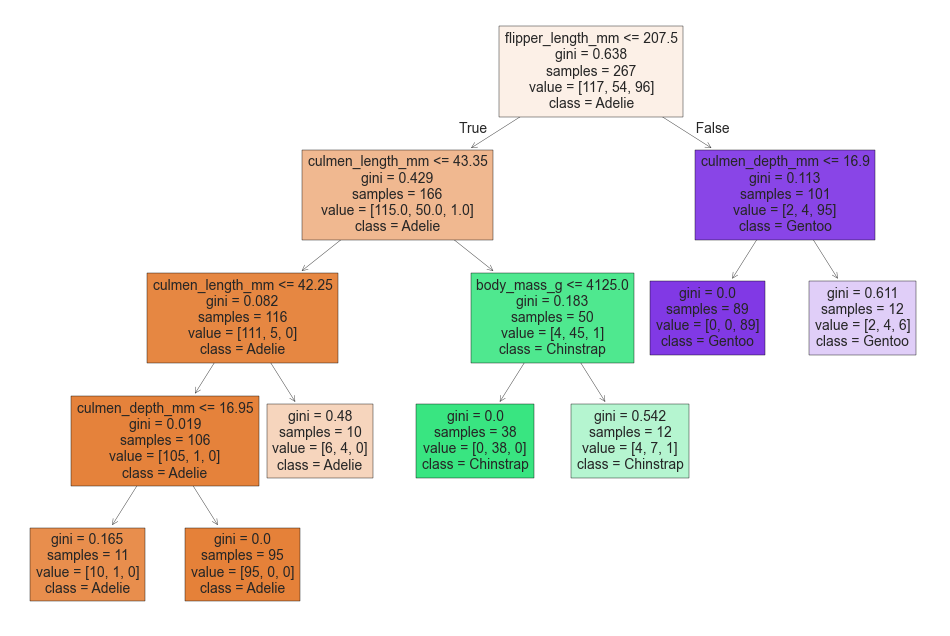

In [90]:
DT_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)

### max_leaf_nodes

 **`max_leaf_nodes` in Decision Trees**

- **Purpose**: Controls the maximum number of leaf nodes in the final model.
- **Effect**: For example, setting *`max_leaf_nodes=7`* ensures that the model branches and splits in a way that results in at most 7 leaf nodes.
- **Usage**: This parameter helps manage the complexity and generalization ability of the model. By limiting excessive branching and detail, it ensures the model remains simpler and more generalized.

The *`max_leaf_nodes`* parameter is particularly useful when working with large datasets or complex data structures. 

Proper tuning of this parameter helps achieve balanced performance on both training and test sets while reducing the risk of overfitting.



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[113   4   0]
 [  1  53   0]
 [  0   1  95]]


              precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98       117
   Chinstrap       0.91      0.98      0.95        54
      Gentoo       1.00      0.99      0.99        96

    accuracy                           0.98       267
   macro avg       0.97      0.98      0.97       267
weighted avg       0.98      0.98      0.98       267



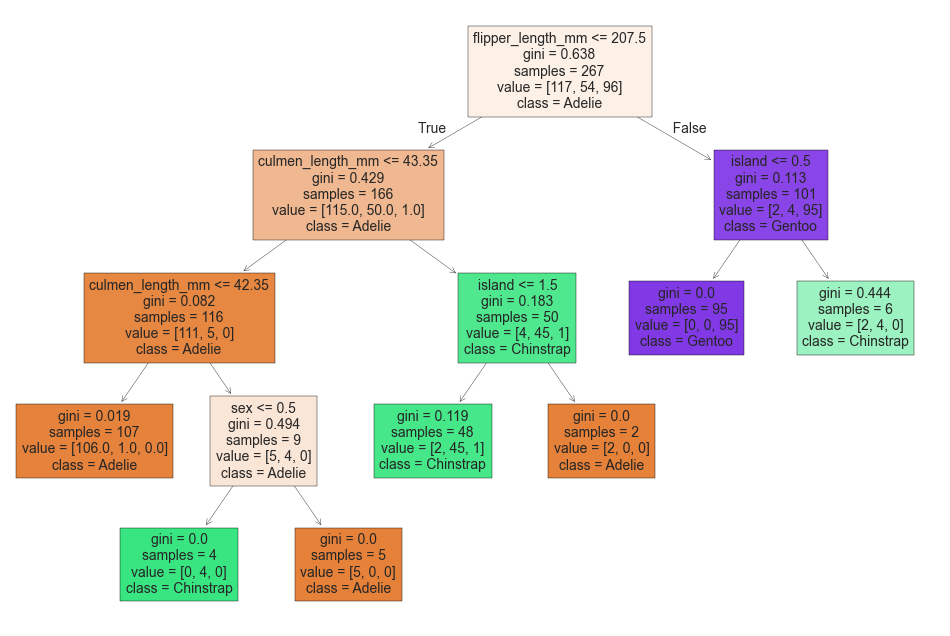

In [91]:
DT_model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)

### splitter 

- **Purpose**: Determines how splits are chosen at each node in the decision tree model.
- **Options**:
  - `'best'`: Selects the best possible split at each node.
  - `'random'`: Selects a random split at each node.
- **Effect**: The `'random'` option increases randomness, which can help reduce the risk of overfitting.



Test Set
[[28  0  1]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



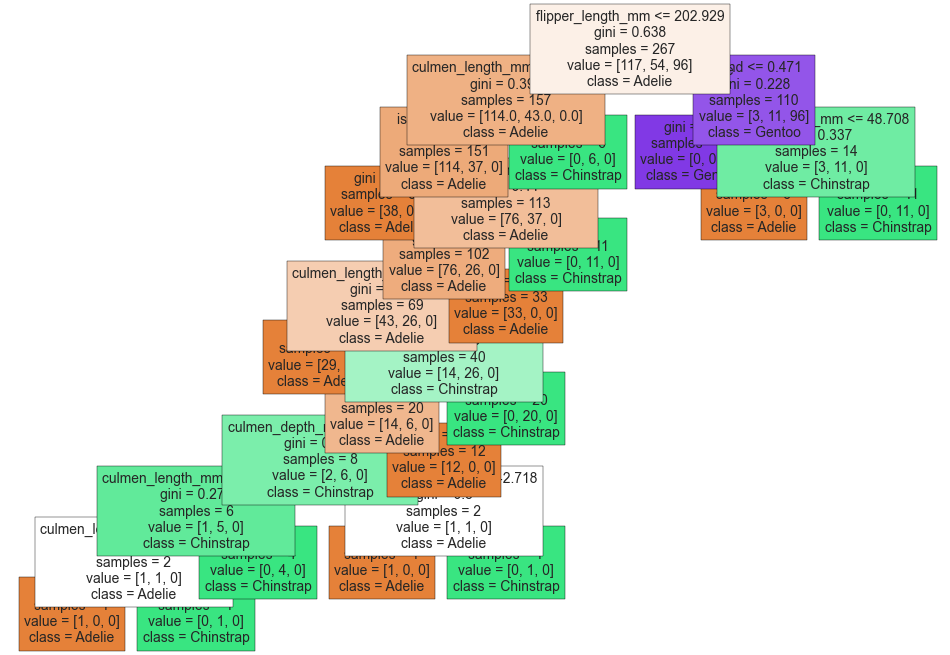

In [92]:
DT_model = DecisionTreeClassifier(splitter="random", random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



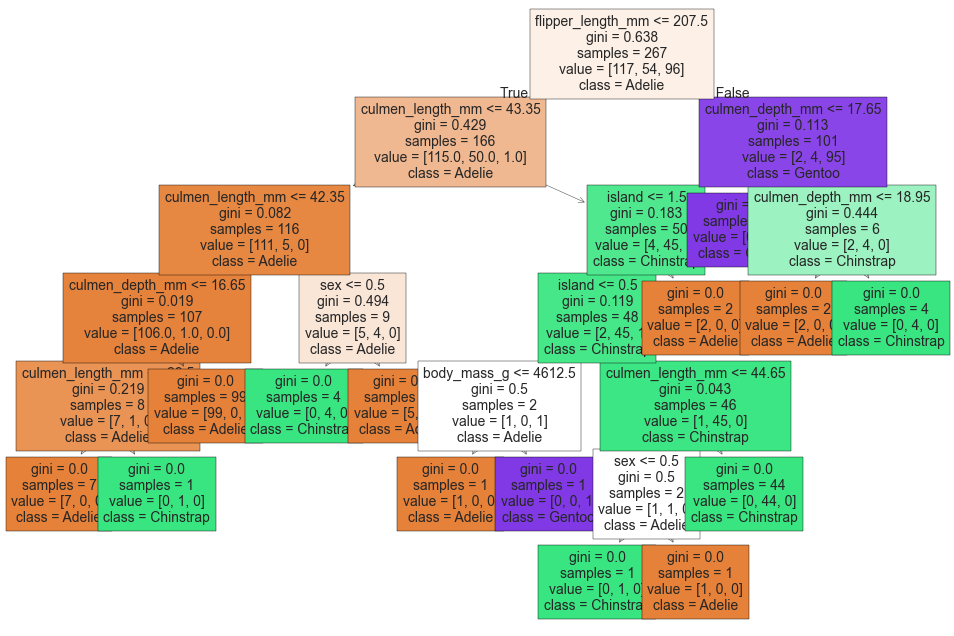

In [93]:
DT_model = DecisionTreeClassifier(splitter="best", random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)

### max_features 

- **Purpose**: Determines the maximum number of features to consider at each split.
- **Options**: `'auto'`, `'sqrt'`, `'log2'`, or an integer value.
- **Effect**: This parameter limits the features considered for splitting, affecting the tree's diversity and generalization ability.




Test Set
[[24  5  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      0.83      0.91        29
   Chinstrap       0.74      1.00      0.85        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.93        67
   macro avg       0.91      0.94      0.92        67
weighted avg       0.95      0.93      0.93        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



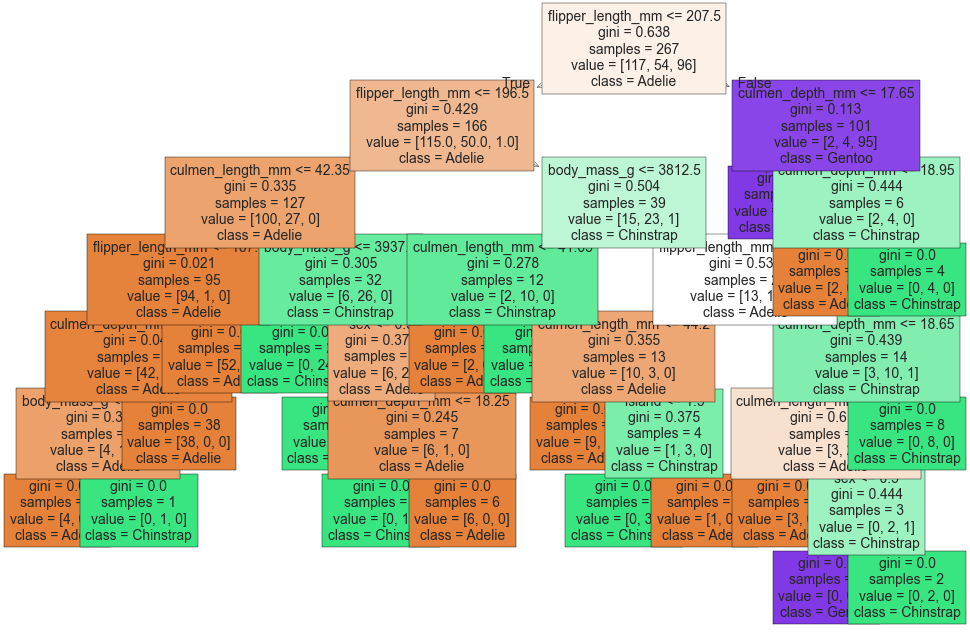

In [94]:
DT_model = DecisionTreeClassifier(max_features=3, random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



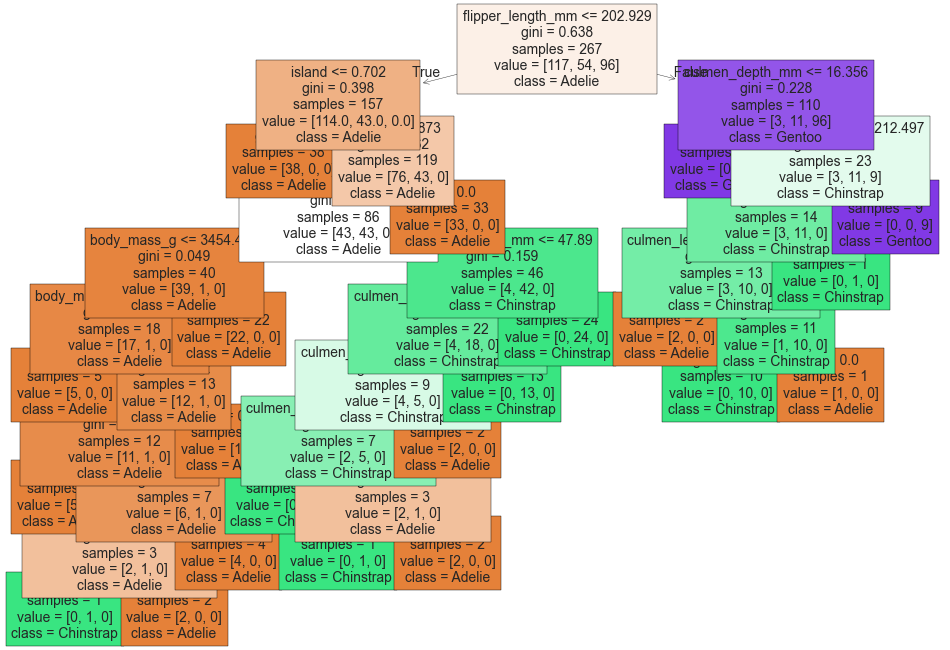

In [103]:
DT_model = DecisionTreeClassifier(max_features=3, splitter="random", random_state=101)

operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]

tree = Pipeline(steps=operations)

tree.fit(X_train, y_train)

report_model(tree)

### criterion 

- **Purpose**: Specifies the function used to split the decision tree.
- **Options**:
  - `'gini'`: Split based on Gini impurity.
  - `'entropy'`: Split based on information gain.
- **Effect**: The chosen criterion influences how the model divides the dataset and makes decisions.



Test Set
[[28  1  0]
 [ 0 14  0]
 [ 0  1 23]]


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      0.96      0.98        24

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



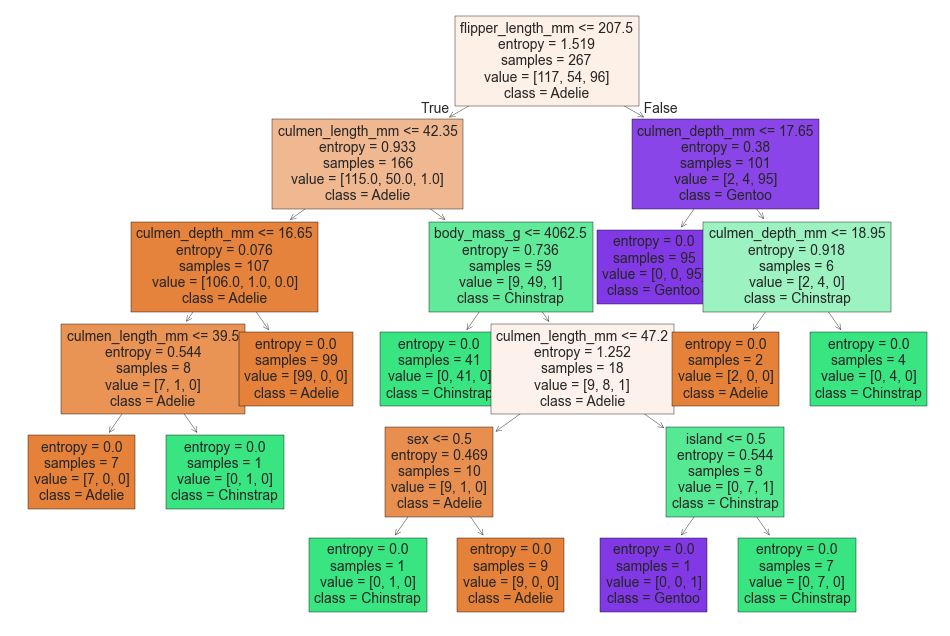

In [95]:
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=101)
operations = [("OrdinalEncoder", column_trans), ("DT_model", DT_model)]
tree = Pipeline(steps=operations)
tree.fit(X_train, y_train)
report_model(tree)

## Find Best Parameters

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(random_state=101))]
model = Pipeline(steps=operations)

In [98]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 5],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 5],
              "DT_model__min_samples_split": [2, 3, 5, 7]}

In [99]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [100]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    5],
                         'DT_model__min_samples_leaf': [1, 2, 3, 5],
                         'DT_model__min_samples_split': [2, 3, 5, 7],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='f1_micro')

In [101]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5,
                                        random_state=101, splitter='random'))])

In [104]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[26  2  1]
 [ 2 17  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.89      0.89      0.89        19
      Gentoo       0.95      1.00      0.97        19

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.93        67
weighted avg       0.93      0.93      0.92        67


Train_Set
[[116   1   0]
 [  1  48   0]
 [  1   0 100]]
              precision    recall  f1-score   support

      Adelie       0.98      0.99      0.99       117
   Chinstrap       0.98      0.98      0.98        49
      Gentoo       1.00      0.99      1.00       101

    accuracy                           0.99       267
   macro avg       0.99      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267



# Final Model & Prediction

In [105]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encode  
0       3750.0    MALE               0  
1       3800.0  FEMALE               0  
2       3250.0  FEMALE               0  
4       3450.0  FEMALE               0  
5       3650.0    MALE               0

**`inverse_transform`** is a method used in encoders like **`LabelEncoder`** to convert numerical labels back into their original categorical labels.

When using a `LabelEncoder`, each unique category is assigned a numerical value. The **`inverse_transform`** method takes these numerical values and converts them back into their corresponding categorical labels.

#### **Example:**
Suppose you have a column where species names are converted into numbers:

From the given data:
- Species: ['setosa', 'versicolor', 'virginica']

The `fit_transform` method assigns numerical values:
- Encoded species: [0, 1, 2]

To reverse this encoding, use the `inverse_transform` method:
- Original species: ['setosa', 'versicolor', 'virginica']

#### **Summary:**
- **`fit_transform`**: Converts categorical values into numerical labels.
- **`inverse_transform`**: Converts numerical labels back into their original categorical values.

This method is particularly useful when you need to return your encoded data back to its original form after processing.

In [106]:
df = df.drop("species", axis=1)


In [107]:
df.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   
2  Torgersen              40.3             18.0              195.0   
4  Torgersen              36.7             19.3              193.0   
5  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encode  
0       3750.0    MALE               0  
1       3800.0  FEMALE               0  
2       3250.0  FEMALE               0  
4       3450.0  FEMALE               0  
5       3650.0    MALE               0

In [108]:
df["species"] = label_encoder.inverse_transform(df["species_encode"])

In [109]:
df.sample(5)

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
343     Biscoe              49.9             16.1              213.0   
219      Dream              50.2             18.7              198.0   
128  Torgersen              39.0             17.1              191.0   
312     Biscoe              45.5             14.5              212.0   
7    Torgersen              39.2             19.6              195.0   

     body_mass_g     sex  species_encode    species  
343       5400.0    MALE               2     Gentoo  
219       3775.0  FEMALE               1  Chinstrap  
128       3050.0  FEMALE               0     Adelie  
312       4750.0  FEMALE               2     Gentoo  
7         4675.0    MALE               0     Adelie

In [110]:
X = df.drop(columns=["species", "species_encode", "flipper_length_mm"])
y = df["species"]

In [111]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeClassifier(min_samples_leaf=2,
                                      min_samples_split=5,
                                      random_state=101,
                                      splitter='random'))]
pipe_final_model = Pipeline(steps=operations)
pipe_final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5,
                                        random_state=101, splitter='random'))])

In [112]:
pd.DataFrame(column_trans.fit_transform(X))

0    1     2     3       4
0    2.0  1.0  39.1  18.7  3750.0
1    2.0  0.0  39.5  17.4  3800.0
2    2.0  0.0  40.3  18.0  3250.0
3    2.0  0.0  36.7  19.3  3450.0
4    2.0  1.0  39.3  20.6  3650.0
5    2.0  0.0  38.9  17.8  3625.0
6    2.0  1.0  39.2  19.6  4675.0
7    2.0  0.0  41.1  17.6  3200.0
8    2.0  1.0  38.6  21.2  3800.0
9    2.0  1.0  34.6  21.1  4400.0
10   2.0  0.0  36.6  17.8  3700.0
11   2.0  0.0  38.7  19.0  3450.0
12   2.0  1.0  42.5  20.7  4500.0
13   2.0  0.0  34.4  18.4  3325.0
14   2.0  1.0  46.0  21.5  4200.0
15   0.0  0.0  37.8  18.3  3400.0
16   0.0  1.0  37.7  18.7  3600.0
17   0.0  0.0  35.9  19.2  3800.0
18   0.0  1.0  38.2  18.1  3950.0
19   0.0  1.0  38.8  17.2  3800.0
20   0.0  0.0  35.3  18.9  3800.0
21   0.0  1.0  40.6  18.6  3550.0
22   0.0  0.0  40.5  17.9  3200.0
23   0.0  0.0  37.9  18.6  3150.0
24   0.0  1.0  40.5  18.9  3950.0
25   1.0  0.0  39.5  16.7  3250.0
26   1.0  1.0  37.2  18.1  3900.0
27   1.0  0.0  39.5  17.8  3300.0
28   1.0  1.0  40.9  18.9  3900.0
29   1.0  0.0  36.4  17.0  3325.0
30   1.0  1.0  39.2  21.1  4150.0
31   1.0  1.0  38.8  20.0  3950.0
32   1.0  0.0  42.2  18.5  3550.0
33   1.0  0.0  37.6  19.3  3300.0
34   1.0  1.0  39.8  19.1  4650.0
35   1.0  0.0  36.5  18.0  3150.0
36   1.0  1.0  40.8  18.4  3900.0
37   1.0  0.0  36.0  18.5  3100.0
38   1.0  1.0  44.1  19.7  4400.0
39   1.0  0.0  37.0  16.9  3000.0
40   1.0  1.0  39.6  18.8  4600.0
41   1.0  1.0  41.1  19.0  3425.0
42   1.0  0.0  36.0  17.9  3450.0
43   1.0  1.0  42.3  21.2  4150.0
44   0.0  0.0  39.6  17.7  3500.0
45   0.0  1.0  40.1  18.9  4300.0
46   0.0  0.0  35.0  17.9  3450.0
47   0.0  1.0  42.0  19.5  4050.0
48   0.0  0.0  34.5  18.1  2900.0
49   0.0  1.0  41.4  18.6  3700.0
50   0.0  0.0  39.0  17.5  3550.0
51   0.0  1.0  40.6  18.8  3800.0
52   0.0  0.0  36.5  16.6  2850.0
53   0.0  1.0  37.6  19.1  3750.0
54   0.0  0.0  35.7  16.9  3150.0
55   0.0  1.0  41.3  21.1  4400.0
56   0.0  0.0  37.6  17.0  3600.0
57   0.0  1.0  41.1  18.2  4050.0
58   0.0  0.0  36.4  17.1  2850.0
59   0.0  1.0  41.6  18.0  3950.0
60   0.0  0.0  35.5  16.2  3350.0
61   0.0  1.0  41.1  19.1  4100.0
62   2.0  0.0  35.9  16.6  3050.0
63   2.0  1.0  41.8  19.4  4450.0
64   2.0  0.0  33.5  19.0  3600.0
65   2.0  1.0  39.7  18.4  3900.0
66   2.0  0.0  39.6  17.2  3550.0
67   2.0  1.0  45.8  18.9  4150.0
68   2.0  0.0  35.5  17.5  3700.0
69   2.0  1.0  42.8  18.5  4250.0
70   2.0  0.0  40.9  16.8  3700.0
71   2.0  1.0  37.2  19.4  3900.0
72   2.0  0.0  36.2  16.1  3550.0
73   2.0  1.0  42.1  19.1  4000.0
74   2.0  0.0  34.6  17.2  3200.0
75   2.0  1.0  42.9  17.6  4700.0
76   2.0  0.0  36.7  18.8  3800.0
77   2.0  1.0  35.1  19.4  4200.0
78   1.0  0.0  37.3  17.8  3350.0
79   1.0  1.0  41.3  20.3  3550.0
80   1.0  1.0  36.3  19.5  3800.0
81   1.0  0.0  36.9  18.6  3500.0
82   1.0  1.0  38.3  19.2  3950.0
83   1.0  0.0  38.9  18.8  3600.0
84   1.0  0.0  35.7  18.0  3550.0
85   1.0  1.0  41.1  18.1  4300.0
86   1.0  0.0  34.0  17.1  3400.0
87   1.0  1.0  39.6  18.1  4450.0
88   1.0  0.0  36.2  17.3  3300.0
89   1.0  1.0  40.8  18.9  4300.0
90   1.0  0.0  38.1  18.6  3700.0
91   1.0  1.0  40.3  18.5  4350.0
92   1.0  0.0  33.1  16.1  2900.0
93   1.0  1.0  43.2  18.5  4100.0
94   0.0  0.0  35.0  17.9  3725.0
95   0.0  1.0  41.0  20.0  4725.0
96   0.0  0.0  37.7  16.0  3075.0
97   0.0  1.0  37.8  20.0  4250.0
98   0.0  0.0  37.9  18.6  2925.0
99   0.0  1.0  39.7  18.9  3550.0
100  0.0  0.0  38.6  17.2  3750.0
101  0.0  1.0  38.2  20.0  3900.0
102  0.0  0.0  38.1  17.0  3175.0
103  0.0  1.0  43.2  19.0  4775.0
104  0.0  0.0  38.1  16.5  3825.0
105  0.0  1.0  45.6  20.3  4600.0
106  0.0  0.0  39.7  17.7  3200.0
107  0.0  1.0  42.2  19.5  4275.0
108  0.0  0.0  39.6  20.7  3900.0
109  0.0  1.0  42.7  18.3  4075.0
110  2.0  0.0  38.6  17.0  2900.0
111  2.0  1.0  37.3  20.5  3775.0
112  2.0  0.0  35.7  17.0  3350.0
113  2.0  1.0  41.1  18.6  3325.0
114  2.0  0.0  36.2  17.2  3150.0
115  2.0  1.0  37.7  19.8  3500.0
116  2.0  0.0  40.2  17.0  34

In [113]:
samples = {"island": ["Torgersen", "Biscoe"],
           "culmen_depth_mm":[18,14],
           "culmen_length_mm": [39, 48],
           'flipper_length_mm':[180, 214],
           "sex":["MALE","FEMALE"],
           'body_mass_g': [3700,4900]
           }

In [114]:
df_sample = pd.DataFrame(samples)
df_sample

island  culmen_depth_mm  culmen_length_mm  flipper_length_mm     sex  \
0  Torgersen               18                39                180    MALE   
1     Biscoe               14                48                214  FEMALE   

   body_mass_g  
0         3700  
1         4900

In [115]:
pipe_final_model.predict(df_sample)

array(['Adelie', 'Gentoo'], dtype=object)